In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr # For later outlier analysis if needed

# Configure visualization settings for better plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [19]:
# --- RESTART YOUR KERNEL AND RUN THIS CORRECTED CELL ---

import pandas as pd
# ... (other imports)

file_name = '../data/MachineLearningRating_v3.txt' 

try:
    # **FIX:** Change the separator to the pipe symbol ('|')
    df = pd.read_csv(file_name, sep='|') 
    print("Data loaded successfully with pipe delimiter!")
    
    print("\n--- Initial Data Structure (Head) ---")
    print(df.head())
    
    print("\n--- Data Structure (Info) ---")
    df.info()

except Exception as e:
    print(f"Error loading data: {e}. Check the file path.")

C:\Users\Her\AppData\Local\Temp\ipykernel_23092\2659891017.py:10: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name, sep='|')


Data loaded successfully with pipe delimiter!

--- Initial Data Structure (Head) ---
   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...              

In [20]:
# --- Column Name Cleanup ---

# 1. Strip external whitespace (just in case)
df.columns = df.columns.str.strip()

# 2. Convert to lowercase and replace spaces/non-alphanumeric with underscore
df.columns = df.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True).str.lower()

print("--- Cleaned Column Names ---")
print(df.columns.tolist())

--- Cleaned Column Names ---
['underwrittencoverid', 'policyid', 'transactionmonth', 'isvatregistered', 'citizenship', 'legaltype', 'title', 'language', 'bank', 'accounttype', 'maritalstatus', 'gender', 'country', 'province', 'postalcode', 'maincrestazone', 'subcrestazone', 'itemtype', 'mmcode', 'vehicletype', 'registrationyear', 'make', 'model', 'cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'numberofdoors', 'vehicleintrodate', 'customvalueestimate', 'alarmimmobiliser', 'trackingdevice', 'capitaloutstanding', 'newvehicle', 'writtenoff', 'rebuilt', 'converted', 'crossborder', 'numberofvehiclesinfleet', 'suminsured', 'termfrequency', 'calculatedpremiumperterm', 'excessselected', 'covercategory', 'covertype', 'covergroup', 'section', 'product', 'statutoryclass', 'statutoryrisktype', 'totalpremium', 'totalclaims']


In [22]:
# --- CORRECTED DESCRIPTIVE STATISTICS CELL ---

# Removed 'policycount' as it is not a direct column in the data.
numerical_cols = ['totalpremium', 'totalclaims', 'customvalueestimate']

print("--- Descriptive Statistics for Financial Variables ---")
print(df[numerical_cols].describe().T)

# PolicyCount is implicitly 1 per row for the calculation of CV
# We will create a PolicyCount column with value 1 to make the CV calculation work seamlessly later.
df['policycount'] = 1 

# Calculate Coefficient of Variation (CV) for variability assessment
# Include 'policycount' for the CV calculation, as it's now in the DataFrame
cv_cols_for_agg = numerical_cols + ['policycount'] 

cv_df = df[cv_cols_for_agg].agg(['mean', 'std']).T
cv_df['CV'] = cv_df['std'] / cv_df['mean']
print("\n--- Coefficient of Variation (Variability) ---")
print(cv_df)

--- Descriptive Statistics for Financial Variables ---
                         count           mean            std           min  \
totalpremium         1000098.0      61.905496     230.284513   -782.576754   
totalclaims          1000098.0      64.861190    2384.074695 -12002.412281   
customvalueestimate   220456.0  225531.129942  564515.749848  20000.000000   

                          25%            50%            75%           max  
totalpremium              0.0       2.178333      21.929825  6.528260e+04  
totalclaims               0.0       0.000000       0.000000  3.930921e+05  
customvalueestimate  135000.0  220000.000000  280000.000000  2.655000e+07  

--- Coefficient of Variation (Variability) ---
                              mean            std         CV
totalpremium             61.905496     230.284513   3.719936
totalclaims              64.861190    2384.074695  36.756567
customvalueestimate  225531.129942  564515.749848   2.503050
policycount               1.000000  

In [24]:
print("--- Missing Values Assessment ---")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage.round(2)
}).sort_values(by='Missing Percentage', ascending=False)

# Display only columns with missing data
print(missing_df[missing_df['Missing Count'] > 0])

--- Missing Values Assessment ---
                         Missing Count  Missing Percentage
numberofvehiclesinfleet        1000098              100.00
crossborder                     999400               99.93
customvalueestimate             779642               77.96
writtenoff                      641901               64.18
converted                       641901               64.18
rebuilt                         641901               64.18
newvehicle                      153295               15.33
bank                            145961               14.59
accounttype                      40232                4.02
gender                            9536                0.95
maritalstatus                     8259                0.83
vehicletype                        552                0.06
vehicleintrodate                   552                0.06
make                               552                0.06
cylinders                          552                0.06
model                 

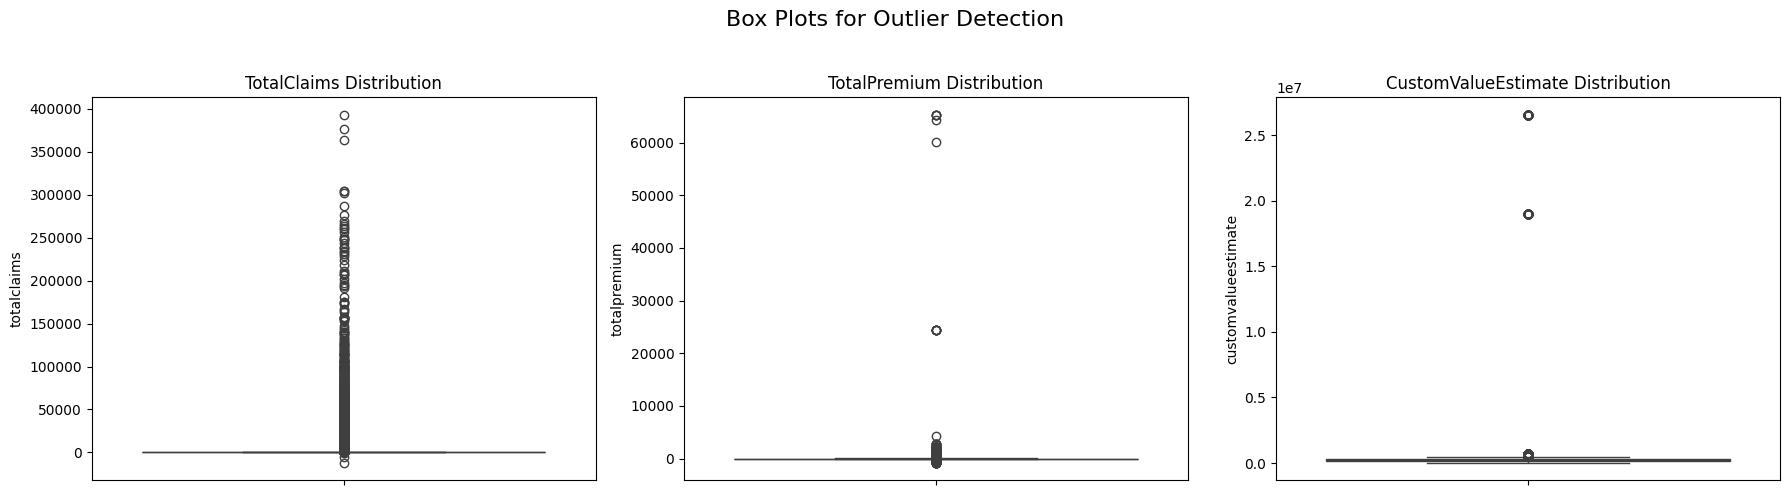

In [27]:
# --- CORRECTED BOX PLOT CODE (Cell 6) ---

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Box Plots for Outlier Detection', fontsize=16)

# 1. TotalClaims (CORRECTED to lowercase)
sns.boxplot(y=df['totalclaims'], ax=axes[0])
axes[0].set_title('TotalClaims Distribution')

# 2. TotalPremium (CORRECTED to lowercase)
sns.boxplot(y=df['totalpremium'], ax=axes[1])
axes[1].set_title('TotalPremium Distribution')

# 3. CustomValueEstimate (CORRECTED to lowercase)
sns.boxplot(y=df['customvalueestimate'], ax=axes[2])
axes[2].set_title('CustomValueEstimate Distribution')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('../reports/figures/box_plots_outliers.png') # Save plot to reports/figures
plt.show()

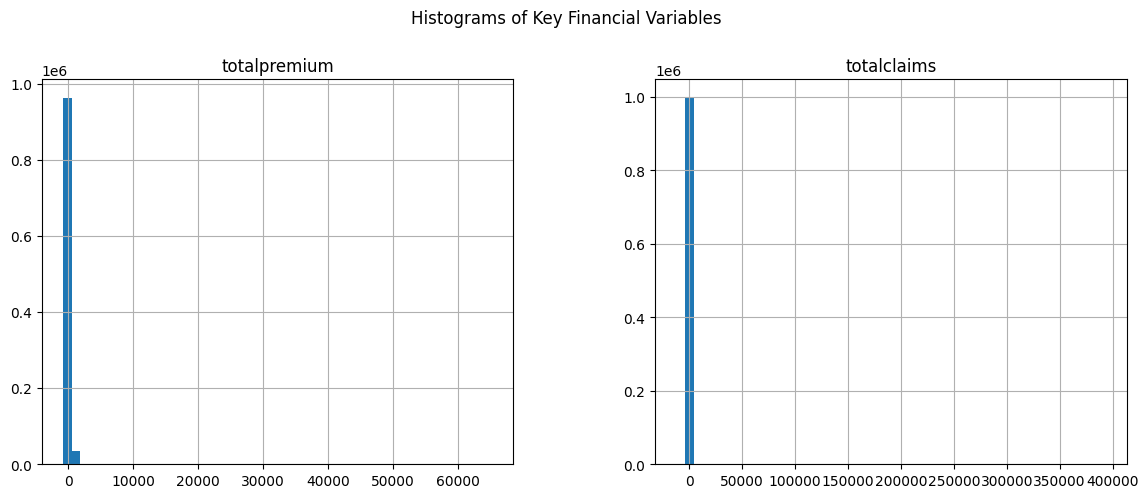

In [36]:
# Histograms for Numerical Data
# --- CORRECTED HISTOGRAM CODE (Cell 7 or similar) ---

# Use the cleaned, lowercase column names!
df[['totalpremium', 'totalclaims']].hist(bins=50, figsize=(14, 5)) 

plt.suptitle('Histograms of Key Financial Variables', y=1.02)
plt.savefig('../reports/figures/histograms_financial_vars.png') # Save the plot
plt.show()


In [30]:
# --- RERUN/EXECUTE DATE CONVERSION AND MONTH CREATION ---

# Find the name of your raw date column (it should be transactionmonth based on your output)
# Note: If your date column is named differently (e.g., 'policydate'), use that name instead!

# Assuming the raw date column is named 'transactionmonth' (from the pipe-separated header list)
# and converting it to datetime. Errors=coerce converts bad dates to NaT (Not a Time).
df['transactionmonth'] = pd.to_datetime(df['transactionmonth'], errors='coerce') 

# Extract the year-month format for temporal grouping
df['TransactionMonth'] = df['transactionmonth'].dt.to_period('M')

print("Date conversion complete. 'TransactionMonth' column created.")
print(df[['transactionmonth', 'TransactionMonth']].head())

Date conversion complete. 'TransactionMonth' column created.
  transactionmonth TransactionMonth
0       2015-03-01          2015-03
1       2015-05-01          2015-05
2       2015-07-01          2015-07
3       2015-05-01          2015-05
4       2015-07-01          2015-07


In [32]:
# Group by the Transaction Month to calculate KPIs
temporal_df = df.groupby('TransactionMonth', observed=False).agg(
    ClaimFrequency=('policycount', 'size'), # Count of policies/transactions
    TotalClaims=('totalclaims', 'sum'),
    TotalPremium=('totalpremium', 'sum')
).reset_index()

# Calculate Claim Severity (Average Claim Amount)
temporal_df['ClaimSeverity'] = temporal_df['TotalClaims'] / temporal_df['ClaimFrequency']

# Calculate Loss Ratio (The primary KPI)
# Loss Ratio = Total Claims / Total Premium
temporal_df['LossRatio'] = temporal_df['TotalClaims'] / temporal_df['TotalPremium']


print("Temporal Analysis DataFrame Head:")
print(temporal_df.head())
print("\nTemporal Analysis DataFrame Info:")
temporal_df.info()

Temporal Analysis DataFrame Head:
  TransactionMonth  ClaimFrequency   TotalClaims  TotalPremium  ClaimSeverity  \
0          2013-10              45      0.000000    371.063512       0.000000   
1          2013-11            1196  50585.078947  21307.467009      42.295217   
2          2013-12            1495   9283.385965  42484.748888       6.209623   
3          2014-01            1827  12436.859649  54085.196865       6.807258   
4          2014-02            2062  62989.307018  60788.436470      30.547676   

   LossRatio  
0   0.000000  
1   2.374054  
2   0.218511  
3   0.229949  
4   1.036205  

Temporal Analysis DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype    
---  ------            --------------  -----    
 0   TransactionMonth  23 non-null     period[M]
 1   ClaimFrequency    23 non-null     int64    
 2   TotalClaims       23 non-null     float64  
 3   To

In [38]:
# Create aggregated features for claims and premium
# **CORRECTED:** Using all lowercase column names for grouping
df_agg = df.groupby(['province', 'vehicletype', 'gender'], observed=False).agg(
    TotalClaims_Sum=('totalclaims', 'sum'),
    TotalPremium_Sum=('totalpremium', 'sum'),
    PolicyCount=('policycount', 'sum')
).reset_index()

# Calculate Loss Ratio (TotalClaims / TotalPremium)
# Handle potential division by zero by setting LR to 0 where Premium is 0 or nan
df_agg['LossRatio'] = np.where(
    df_agg['TotalPremium_Sum'] > 0,
    df_agg['TotalClaims_Sum'] / df_agg['TotalPremium_Sum'],
    0
)

print("Aggregated Loss Ratio DataFrame Head:")
print(df_agg.head())

Aggregated Loss Ratio DataFrame Head:
       province        vehicletype         gender  TotalClaims_Sum  \
0  Eastern Cape   Heavy Commercial  Not specified     0.000000e+00   
1  Eastern Cape   Light Commercial  Not specified     0.000000e+00   
2  Eastern Cape  Medium Commercial  Not specified     6.468882e+04   
3  Eastern Cape  Passenger Vehicle  Not specified     1.291738e+06   
4    Free State   Heavy Commercial  Not specified     0.000000e+00   

   TotalPremium_Sum  PolicyCount  LossRatio  
0      4.385965e+01            1   0.000000  
1      8.409669e+02           72   0.000000  
2      6.701838e+04          841   0.965240  
3      2.072201e+06        29422   0.623365  
4      4.608827e+03           46   0.000000  


In [41]:
# --- CORRECTED VEHICLE RISK ANALYSIS CODE (Cell 9) ---

# Group by Vehicle Make and calculate average claims
# CORRECTED: All column names must be lowercase
vehicle_claims = df.groupby('make', observed=False).agg(
    AvgClaimAmount=('totalclaims', 'mean'),  # Corrected to lowercase
    TotalPolicies=('policycount', 'size')    # Corrected to lowercase
).reset_index()

# Filter for makes with a reasonable volume of policies to avoid noise
min_policies_threshold = 50 
vehicle_claims_filtered = vehicle_claims[vehicle_claims['TotalPolicies'] >= min_policies_threshold]

# Sort to find the highest and lowest claim risks
high_risk_makes = vehicle_claims_filtered.sort_values(
    by='AvgClaimAmount', ascending=False
).head(5)

low_risk_makes = vehicle_claims_filtered.sort_values(
    by='AvgClaimAmount', ascending=True
).head(5)

print("--- Top 5 Highest Risk Vehicle Makes (Based on Avg Claim Amount) ---")
print(high_risk_makes)
print("\n--- Top 5 Lowest Risk Vehicle Makes ---")
print(low_risk_makes)

--- Top 5 Highest Risk Vehicle Makes (Based on Avg Claim Amount) ---
                                   make  AvgClaimAmount  TotalPolicies
40  SUZUKI                                   419.634546            408
22  JMC                                      191.684795            120
18                              HYUNDAI      174.215195           2602
26                            MARCOPOLO      156.794806             51
0                                  AUDI      137.843083           7407

--- Top 5 Lowest Risk Vehicle Makes ---
                                   make  AvgClaimAmount  TotalPolicies
6   CITROEN                                         0.0            561
4   CHERY                                           0.0            361
16                                HONDA             0.0            130
11  FORD                                            0.0            242
13  GEELY                                           0.0            108


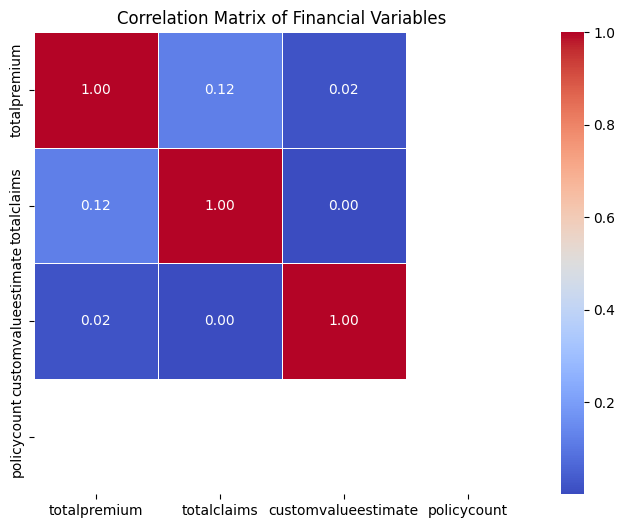

In [42]:
# Select numerical columns for correlation
corr_cols = ['totalpremium', 'totalclaims', 'customvalueestimate', 'policycount']

# Calculate correlation matrix
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Financial Variables')
plt.show()

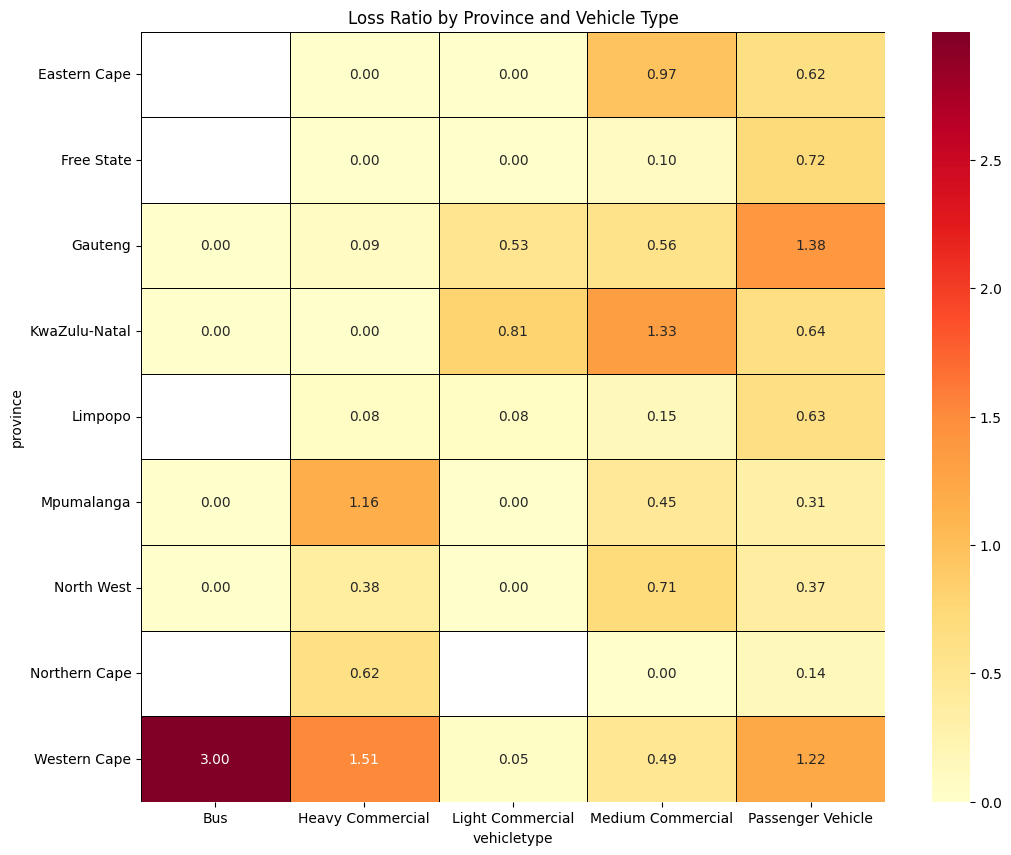

In [46]:
# --- CORRECTED HEATMAP CODE ---

# Use the exact column name 'LossRatio' (mixed case) as created in df_agg
# Ensure index and columns are lowercase ('province', 'vehicletype')
lr_pivot = df_agg.pivot_table(
    index='province', 
    columns='vehicletype', 
    values='LossRatio' # CORRECTED: Changed to 'LossRatio'
)

plt.figure(figsize=(12, 10))
# Ensure columns are properly accessed on the original df for the aggregation variables
sns.heatmap(lr_pivot, cmap="YlOrRd", annot=True, fmt=".2f", linewidths=.5, linecolor='black')
plt.title('Loss Ratio by Province and Vehicle Type')
plt.savefig('../reports/figures/loss_ratio_heatmap.png')
plt.show()

In [48]:
# --- CORRECTED ZIPCODE ANALYSIS CODE ---

# Group by ZipCode and aggregate claims and premium data
# CORRECTED: All column names must be lowercase
zip_agg = df.groupby('postalcode', observed=False).agg(
    AvgPremium=('totalpremium', 'mean'),
    AvgClaims=('totalclaims', 'mean'),
    TotalPolicies=('policycount', 'size')
).reset_index()

# Filter to ZipCodes with significant policy count
min_policies_threshold = 50 
zip_agg_filtered = zip_agg[zip_agg['TotalPolicies'] > min_policies_threshold]

# Calculate the claims-to-premium ratio for risk assessment
zip_agg_filtered['RiskRatio'] = zip_agg_filtered['AvgClaims'] / zip_agg_filtered['AvgPremium']

print("ZipCode Risk Analysis (Top 5 Riskiest ZipCodes):")
print(zip_agg_filtered.sort_values(by='RiskRatio', ascending=False).head(5))

ZipCode Risk Analysis (Top 5 Riskiest ZipCodes):
     postalcode  AvgPremium    AvgClaims  TotalPolicies  RiskRatio
436        2470    0.000000    10.625000             80        inf
241        1342   36.525581  1548.412041            110  42.392537
881        9756   67.984311  1193.336058            132  17.553110
555        4008   31.470283   394.452347            222  12.534122
470        2920  145.097967  1758.275279             55  12.117849


C:\Users\Her\AppData\Local\Temp\ipykernel_23092\2062836497.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_agg_filtered['RiskRatio'] = zip_agg_filtered['AvgClaims'] / zip_agg_filtered['AvgPremium']


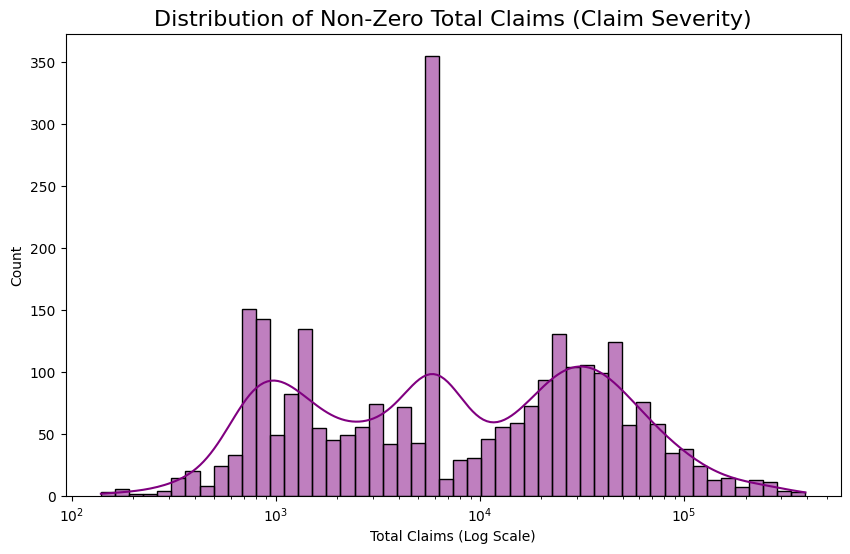

<Figure size 640x480 with 0 Axes>

In [53]:
# Focus on non-zero claims for severity analysis
claims_nonzero = df[df['totalclaims'] > 0]

plt.figure(figsize=(10, 6))
sns.histplot(claims_nonzero['totalclaims'], bins=50, kde=True, log_scale=True, color='purple')
plt.title('Distribution of Non-Zero Total Claims (Claim Severity)', fontsize=16)
plt.xlabel('Total Claims (Log Scale)')
plt.ylabel('Count')
plt.show()
plt.savefig('../reports/figures/distribution_of_non_zero_totalclaim.png')

# Conclusion based on this plot: Mention that the distribution is highly skewed 
# (potentially following a Gamma or Lognormal distribution), justifying the use 
# of generalized linear models (GLMs) or tree-based models for prediction.